# Maschinelles Lernen (ML), Praktikum 2
Dieser Kurs vermittelt den Umgang mit den Pythonbibliotheken `matplotlib`, `NumPy`, `Pandas` und `Scikit-Learn`. Dabei werden Sie anhand eines Beispielprojekts vom Anfang bis zum Ende geführt. Im Rahmen dieser Übung werden Sie die folgenden Schritte durchlaufen: 
- Einführung in Numpy, Pandas und Matplotlib
- Daten auswerten und visualisieren, um Erkenntnisse zu gewinnen
- Vorbereitung der Daten
- Modell Auswahl und Training 
- Präsentieren Sie Ihre Lösung

In dieser Übung experimentieren Sie mit realen Datensätzen. Hierfür stehen einige frei verfügbare Datensätze aus unterschiedlichen Fachgebieten zur Verfügung: 
- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
- [Kaggle](https://www.kaggle.com/datasets)
- [Amazon AWS](http://aws.amazon.com/fr/datasets/)

# Einführung in Numpy, Matplotlib und Pandas

Numpy ist eine Python-Bibliothek, die für numerische Berechnungen verwendet wird. Numpy stellt hauptsächlich ein mehrdimensionales Array-Objekt zusammen mit effizient implementierten Funktionen zur Verfügung. Um Numpy zu nutzen müssen wir es zunächst importieren. Üblicherweise bindet man es unter dem Namen `np` ein.

In [1]:
import numpy as np

Praktische mathematische Funktionen:

| Operator     | Beschreibung                                             |
|--------------|----------------------------------------------------------|
| ``np.linalg.inv``    | Inverse der Matrix                               |
| ``np.linalg.eig``    | Eigenwerte der Matrix                            |
| ``np.matmul``        | Matrix-Multiplikation                            |
| ``np.zeros``         | Matrix mit Nullen erstellen (`.ones` für Einsen) |
| ``np.arange``        | Start, Stopp und Schrittweite                    |
| ``np.identity``      | Create an identity matrix                        |
| ``np.vstack``        | Vertically stack 2 arrays                        |

<span style="display:none"></span>

Hilfreiche Funktionen für die Fehlersuche:

| Operator                       | Beschreibung                                     |
|--------------------------------|--------------------------------------------------|
| ``array.shape``                | Form des Numpy-Arrays abfragen                   |
| ``array.dtype``                | Datentyp des Arrays prüfen                       |
| ``type(stuff)``                | Typ einer Variablen abfragen                     |
| ``print(f"Data type of integer is {name}")`` | Einfacher Weg eine Nachricht zu erzeugen         |

<span style="display:none"></span>


## Allgemeine Numpy Verwendung
Initialisierung mit Listen:

In [2]:
array_1d = np.array([1, 2, 3, 4])
print(array_1d.shape)
array_1by4 = np.array([[1, 2, 3, 4]])
print(array_1by4.shape)

large_array = np.array([i for i in range(400)])
print(large_array.shape)

large_array = large_array.reshape((20, 20))
print(large_array.shape)

(4,)
(1, 4)
(400,)
(20, 20)


Listen mit verschiedenen Typen. Numpy verwendet einen Autocasts, der dem Array `from_list_2d` automatisch eine höherere Präzision zuweist.

In [3]:
from_list = np.array([1, 2, 3])
from_list_2d = np.array([[1, 2, 3.0], [4, 5, 6]])
from_list_bad_type = np.array([1, 2, 3, "a"])

print(f'Data type of integer is {from_list.dtype}')
print(f'Data type of float is {from_list_2d.dtype}')

Data type of integer is int64
Data type of float is float64


Numpy unterstützt viele Arten von algebraischen Operationen auf einem ganzen Array

In [4]:
array_1d + 5
array_1d * 5
np.sqrt(array_1d)
np.power(array_1d, 2)
np.exp(array_1d)
np.log(array_1d)

array([0.        , 0.69314718, 1.09861229, 1.38629436])

### Punktprodukt und Matrix-Multiplikation
Einige Möglichkeiten das Punktprodukt zu schreiben

In [5]:
array_1d @ array_1d
array_1d.dot(array_1d)
np.dot(array_1d, array_1d)

30

Matrix-Multiplikation

In [6]:
weight_matrix = np.array([1, 2, 3, 4]).reshape(2, 2)
sample = np.array([[50, 60]]).T
np.matmul(weight_matrix, sample)

array([[170],
       [390]])

2D Matrix-Multiplikation

In [7]:
mat1 = np.array([[1, 2], [3, 4]])
mat2 = np.array([[5, 6], [7, 8]])
np.matmul(mat1, mat2)

array([[19, 22],
       [43, 50]])

Elementweise Multiplikation

In [8]:
a = np.array([i for i in range(10)]).reshape(2, 5)
a * a
np.multiply(a, a)
np.multiply(a, 10)

array([[ 0, 10, 20, 30, 40],
       [50, 60, 70, 80, 90]])

## Plotting
Matplotlib kann zum Erstellen von Plots und Diagrammen verwendet werden. Üblicherweise bindet man es unter dem Namen `plt` ein. Die Bibliothek wird wie folgt verwendet:
1. Aufruf einer Plotting-Funktion mit einigen Daten mit `.plot()`.
2. Funktionen aufrufen, um die Eigenschaften des Plots einzustellen (z.B. Beschriftungen und Farben).
3. Den Plot sichtbar machen mit `.show()`.

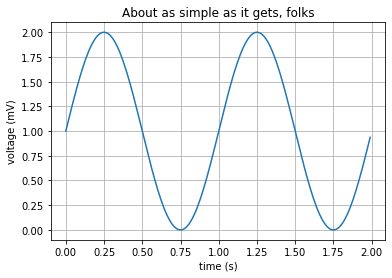

In [9]:
# Import
import matplotlib
import matplotlib.pyplot as plt

# Create data
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Plotting
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel = "time (s)", ylabel = "voltage (mV)", title = "About as simple as it gets, folks")
ax.grid()
fig.savefig("test.png")  # Saves the current plot into a .png file located in the same folder
plt.show()

### Plot mit gestrichelten Linien und einer Legende

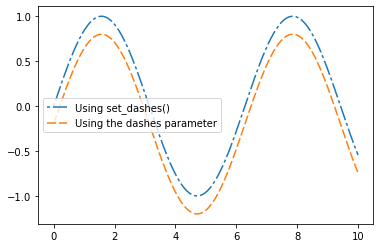

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
y = np.sin(x)

fig, ax = plt.subplots()

line1, = ax.plot(x, y, label = "Using set_dashes()")
# 2pt line, 2pt break, 10pt line, 2pt break
line1.set_dashes([2, 2, 10, 2])

line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label = "Using the dashes parameter")

ax.legend()
plt.show()


## Pandas 
Pandas bietet Datenstrukturen und Funktionen zur schnellen Manipulation und Analyse von Daten. Es setzt dabei auf die effizienten Datenmodelle von Numpy auf und analysiert Tabellen in verschiedenen Größen in Sekundenbruchteilen. Für das Maschinelle Lernen ist Pandes eine hilfreiche Bibliothek, da die Pandas-Dataframes und die Tabellenobjekte
des Frameworks grafisch als Tabellen aufbereitet werden. Üblicherweise bindet man Pandas unter dem Namen `pd` ein.

In [11]:
import pandas as pd

Nun laden wir die Daten mit Pandas. Ums Einlesen kümmert sich ``pd.read_csv()``. Die Spaltennamen können mit einer Liste ``names`` per Hand festgelegt werden, falls die Datei keine zufriedenstellenden Spaltennamen liefert. Pandas bestimmt die Datentypen der Spalten automatisch, arbeitet aber schneller, wenn man die Typen als Dictionary im Parameter ``dtype`` definiert.

In [12]:
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

# Optional
# dtype={"sepal-length": float,
# "sepal-width": float,
# "petal-length": float,
# "petal-width": float, 
# "class": str})

iris_data = pd.read_csv("iris.csv", names = names)

### Ein Blick auf den Datensatz
Wir verwenden den Iris-Datensatz, um die Klassifikation zu veranschaulichen. Es handelt sich hierbei um einen Datensatz, der die Länge und Breite der Kelchblätter (engl. sepal) und Kronblätter (engl. petal) von 150 Iris-Blüten aus drei Unterarten unterscheidet: *Iris-Setosa*, *Iris-Virginica* und *Iris-Versicolor*. 

<center>
<img src="fig/iris_flower.png" width="50%" alt="iris">
</center>

### Ein Blick auf die Daten
Schauen wir uns die ersten fünf Zeilen des DataFrames mit der Methode `.head()` an. 

In [13]:
iris_data.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Jede Zeile steht für eine Messung. Es gibt vier Merkmale: *sepal-length*, *sepal-width*, *petal-length* und *petal-width*. Sie Spalte *class* gibt das dazugehörige Label an. Die Methode `.info()` hilft, schnell eine Beschreibung der Daten zu erhalten. Die Funktion gibt eine Übersicht der Zeilenanzahl, den Typ jedes Attributs und die Anzahl der Werte, die ungleich null sind an. 

In [14]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Die Methode `.describe()` fasst die numerischen Merkmale zusammen.

In [15]:
iris_data.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Eine Möglichket, nach nach sinnvollen Merkmalskombinationen zu suchen, ist die in Pandas eingebaute Funktion ``scatter_matrix``, die jedes numerische Merkmal gegen jedes andere aufträgt.

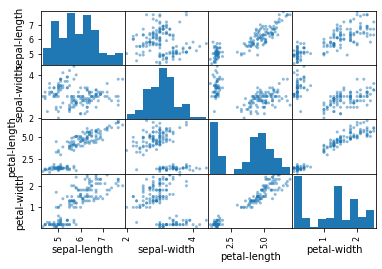

In [16]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

scatter_matrix(iris_data)
pyplot.show()

[Seaborn](https://seaborn.pydata.org/index.html) ist eine Python-Datenvisualisierungsbibliothek, die auf der Matplotlib basiert. Sie bietet eine High-Level-Schnittstelle zum Zeichnen attraktiver und informativer statistischer Grafiken.

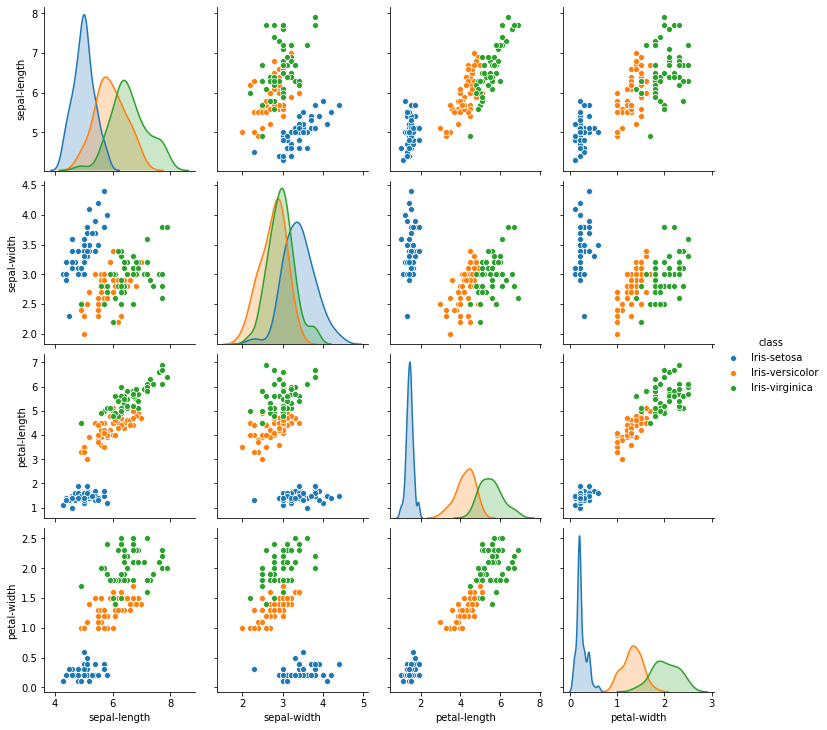

In [17]:
import seaborn as sns

df = iris_data
sns.pairplot(df, hue="class")

### Umgang mit Text und kategorischen Einträgen
Bisher haben wir uns nur mit numerischen Spalten befasst, aber jetzt wollen wir uns die Textspalten ansehen. In diesem Datensatz ist das die Spalte *class*.

In [18]:
iris_categories = iris_data['class']
iris_categories.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

Es ist kein willkürlicher Text. Es gibt eine begrenzte Anzahl von möglichen Werten, von denen jeder eine Kategorie bzw. Klasse repräsentiert. Die meisten Algorithmen arbeiten lieber mit Zahlen, also transformieren wir diese Kategorie in Zahlen um. Hierfür können wir die Klasse `LabelEncoder` von Scikit-Learn verwenden.

**Notiz.** [*Scikit-Learn*](http://scikit-learn.org/) enthält effiziente Implementierungen vieler Machine-Learning-Algorithmen. Es bietet einen guten Ausgangspunkt verschiedene Algorithmen auszutesten, ohne jeden einzelnen zu entwickeln. Einen Kurzüberblick über Scikit-Learn finden Sie in dem Ilias Ordner.

In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris_data["class_code"] = lb_make.fit_transform(iris_data["class"])

In [20]:
iris_categories = iris_data["class_code"]
iris_data.describe()

sepal-length  sepal-width  petal-length  petal-width  class_code
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

## Klassifikation
Für den Anfang werden wir die Klassifizierung vereinfachen und lediglich versuchen, zwei Unterarten der Iris-Blüte zu erkennen. Dieser Ansatz ist ein Beispiel für einen *binären Klassifikator*, mit dem sich genau zwei Kategorien unterscheiden lassen (z.B. *Iris-versicolor* und *Iris-virginica*). Erstellen wir also zunächst einen Datensatz mit den beiden Klassen *Iris-versicolor* und *Iris-virginica*.

In [21]:
iris_data = iris_data[iris_data.class_code<=1]
iris_data.describe()

sepal-length  sepal-width  petal-length  petal-width  class_code
count    100.000000   100.000000    100.000000   100.000000  100.000000
mean       5.471000     3.094000      2.862000     0.785000    0.500000
std        0.641698     0.476057      1.448565     0.566288    0.502519
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.000000     2.800000      1.500000     0.200000    0.000000
50%        5.400000     3.050000      2.450000     0.800000    0.500000
75%        5.900000     3.400000      4.325000     1.300000    1.000000
max        7.000000     4.400000      5.100000     1.800000    1.000000

In einem weiteren Schritt erstellen wir den Zielvektor $y$ für diese Klassifikationsaufgabe. Bei einer überwachten Lernaufgabe sind das die Labels in dem Datensatz.

In [22]:
# Sie können eine Variable mit Punkt-Notation extrahieren
y = iris_data.class_code
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_code, dtype: int64

#### Auswahl von Merkmale (engl. Features)
Die Spalten, die dem Modell als Input dienen (und später zur Erstellung von Vorhersagen verwendet werden), werden als Merkmale (engl. Features) bezeichnet. Vorerst werden wir ein Modell mit nur zwei Merkmalen erstellen. Die Auswahl mehrerer Merkmale erfolgt durch eine Liste der Spaltennamen. Jedes Element in dieser Liste sollte eine Zeichenfolge sein (String). 

## **Aufgabe 2.1:** 
Wählen Sie zwei geeignete Merkmale. Verwenden Sie dafür die oben beschriebene Scatter-Matrix. 

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class', 'class_code']


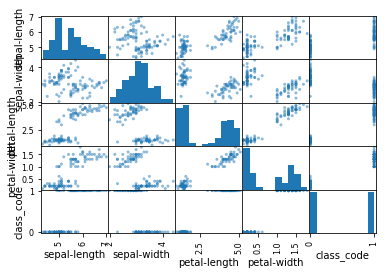

In [23]:
# Merkmale auswählen und berechnen
''' Hilfe
Plotten Sie die Merkmale in einem zweidimensionalem Scatterplot. Unterscheiden Sie dabei „gute“ 
und „schlechte“ Merkmale voneinander. Eignen sich die gewählten Merkmale für eine Klassifikation oder eher nicht?
'''
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

scatter_matrix(iris_data)
print(list(iris_data.columns))
pyplot.show()

### Auswahl der Features
An der Scatter-Matrix kann man erkennen, dass sich die Merkmale "petal-width" und "petal-length" besonders gut für die Klassifizierung eignen, da die beiden Klassen in diesen Merkmalen im Gegensatz zu den anderen Merkmalen nur eine geringe Schnittmenge haben.

In [24]:
iris_features = ['petal-length','petal-width']
X = iris_data[iris_features]
X.head()

petal-length  petal-width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2

Bevor wir nun einen Klassifikator auswählen und trainieren, sollten Sie einen Testdatensatz erstellen, beiseitelegen und nicht mehr hineinschauen.

#### Testdatensatz erstellen
Bis jetzt haben wir kurzen Blick auf die Daten geworfen und sicherlich sollten Sie noch eine ganze Menge mehr darüber lernen, bevor Sie entscheiden, welche Algorithmen Sie verwenden. Das kann aber dazu führen, dass Ihr Gehirn (ein erstaunliches Mustererkennungssystem) anfällig für eine Überanpassung des Problems wird (engl. Overfitting). Sie auf ein scheinbar interessantes Muster stoßen, welches eine bestimmte Art von Modell bevorzugt. Dieses Problem wird auch als *Data Snooping-Bias* bezeichnet. 

<center>
<img src="fig/train-test.png" width="50%" alt="train-test">
</center>

Einen Testdatensatz zu erstellen, ist sehr einfach. Wählen Sie zufällig einige Datenpunkte aus (meist 20% des Datensatzes) und legen Sie diese beiseite. `train_test_split(...)` ist eine Funktion in Sklearn zur Aufteilung des Datensatzes in Trainingsdaten und in Testdaten. Die Funktion hat mehrere Parameter. Ein einfaches Beispiel für die Syntax würde wie folgt aussehen: 

`train_test_split(X, y, train_size=0.*, test_size=0.*, random_state=*)`
- `X, y` Als erster Parameter wird der Datensatz angegeben, den Sie verwenden möchten.
- `train_size` Dieser Parameter legt die Größe des Trainingsdatensatzes fest, die zwischen 0,1 und 1,0 liegt.
- `test_size` Dieser Parameter gibt die Größe des Testdatensatzes.
- `random_state` Der Standardmodus führt eine zufällige Aufteilung unter Verwendung von `np.random.seed(any_number)`.


## **Aufgabe 2.2:** 
Teilen Sie den Datensatz in einen Trainings- und einen Testdatensatz auf. Verwenden Sie dabei einen 80/20 split.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=np.random.seed(42))

#### Trainieren und Auswerten
Wir wissen nicht, welche Algorithmen für dieses Problem gut geeignet wären oder welche Konfigurationen verwendet werden sollten. Aus den Darstellungen haben wir die Idee gewonnen, dass einige der Klassen teilweise linear trennbar sind, so dass insgesamt gute Ergebnisse zu erwarten sind. Lassen Sie uns drei verschiedene Algorithmen untersuchen:
- Logistic Regression (LR),
- k-Nearest Neighbors (KNN) und eine
- Support Vector Machines (SVM).

Dies ist eine gute Mischung aus einfachen linearen (LR) und nicht-linearen (KNN, SVM) algorithmen. [*Scikit-Learn*](http://scikit-learn.org/) enthält bereits effiziente Implementierungen der drei Machine-Learning-Algorithmen.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression(solver='liblinear', multi_class='ovr')

Um das Training zu starten, reicht ein Aufruf von `.fit(..)`. Die Funktion nimmt als Parameter den zuvor erstelten Trainingsdatensatz entgegen.

In [27]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Nach dem Training könnten Sie das Model evaluieren. Übergeben Sie hierfür der Funktion `.predict(...)` mit Daten. Als Qualitätsmaß verwenden wir die Genauigkeit (engl. Accuracy), die den Prozentwert der korrekt klassifizierten Prädiktionen angibt:
$$ \mathrm{Accuracy} = \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN}} $$

<center>
    <img src="fig/conf-matrix.png" width="35%" alt="conf-matrix">
</center>

In [28]:
model_lr_predictions = model_lr.predict(X_train)
print(accuracy_score(y_train, model_lr_predictions))

1.0


## **Aufgabe 2.3:** 
Vervollständigen Sie die Code-Zellen für die beiden anderen Klassifikatoren und geben Sie jeweils die Accuracy für den Trainings- und Testdatensatz aus.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
model_knn_predictions = model_knn.predict(X_train)
print(accuracy_score(y_train, model_knn_predictions))

1.0


In [31]:
from sklearn.svm import SVC

model_svc = SVC(gamma='auto')
model_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
model_svc_predictions = model_svc.predict(X_train)
print(accuracy_score(y_train, model_svc_predictions))

1.0


## **Aufgabe 2.5:** 
Entwerfen Sie einen einfachen binären Klassifikator, der nur eine Zahl in einem Datensatz erkennt. Verwenden Sie hierfür den MNIST-Datensatz. Dieser beinhaltet eine Sammlung von 70000 Bildern handschriftlicher Ziffern, die von Oberschülern und Mitarbeitern des US Census Bureaus aufgeschrieben wurden. Jedes Bild ist mit der dargestellten Ziffer gelabelt.

##### Vorbereitungen
In dem Datensatz gibt es 70000 Bilder, jedes davon hat 768 Merkmale. Das liegt daran, das jedes Bild aus 28 x 28 Pixeln besteht und jedes Merkmal die Intensität eines Pixels von
0 (weiß) bis 255 (schwarz) enthält. Betrachten wir eine Ziffer aus dem Datensatz. Dazu muss der Merkmalsvektor eines Datenpunkts herausgreifen werden, zu einem Array mit den Abmessungen 28 x 28 umformatieren und mit der Funktion imshow() aus Matplotlib dargestellt werden:

In [33]:
mnist = pd.read_csv("mnist_train.csv")
mnist.shape

(60000, 785)

In [34]:
mnist.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [35]:
X_train, y_train = mnist.drop(['label'],axis=1).values, mnist["label"]
X_train.shape

(60000, 784)

In [36]:
y_train.shape

(60000,)

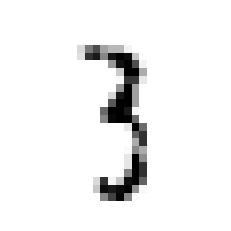

In [37]:
some_digit = X_train[22000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

##### Entwickeln Sie einen binären Klassifikator:
- Erstellen Sie den Zielvektor. Verden Sie hierfür den Befehl `y_train_my_number = (y == my_number)`. Die Aussage ist True bei allen "my_number" und False bei allen anderen Ziffern. 

In [38]:
# Ihr Code ...
my_number = 7
y_train_my_number = (y_train == my_number)
y_train_my_number.describe()

count     60000
unique        2
top       False
freq      53735
Name: label, dtype: object

- Wählen Sie einen Klassifikator aus, trainieren diesen und geben Sie die Accuracy an. In diesem Fall ist es ratsam das *stochastische Gradientenverfahren* (SGD) als Klassifikator zu verwenden. Er ist in der Klasse SGDClassifier in Scikit-Learn enthalten. Dieser Klassifikator hat den Vorteil, sehr große Datensätze effizient zu bearbeiten.

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train_my_number)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
sgd_clf_predictions = sgd_clf.predict(X_train)
print(accuracy_score(y_train_my_number,sgd_clf_predictions))

0.9826333333333334


- Vergleich Sie Ihr Ergebnis mit einen sehr primitiven Klassifikator, der einfach jedes Bild der Kategorie ``never_my_number`` zuordnet:

In [41]:
from sklearn.base import BaseEstimator
class NeverMyNumberClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [42]:
never_my_number_clf = NeverMyNumberClassifier()
never_my_number_clf.fit(X_train, y_train_my_number)
never_my_number_clf_predictions = never_my_number_clf.predict(X_train)
print(accuracy_score(y_train_my_number, never_my_number_clf_predictions))

0.8955833333333333


Versuchen Sie mit eigenen Worten zu erklären, warum diese Genauigkeit mit einem solchen primitiven Klassifikator erreicht wird. 

**Antwort:**
Die Genauigkeit kommt daher, dass die meisten Elemente in die Klasse "not_my_number" fallen. Daher ist die Vorhersage, dass die aktuell vorliegende Nummer nicht die gewünschte ist in den meisten Fällen richtig.

- Zur Bewertung der Güte eines Klassifikator existieren noch andere Metriken, die ihre eigenen Vor- und Nachteile haben. Welches sind die bekanntesten Metriken und warum könnte es wichtig sein, die richtige Metrik für die richtige Situation zu wählen?

**Antwort:** Mithilfe der Anzahl der falschen bzw. richtigen positiven und negativen Vorhersagen lassen sich mehrere Aussagen über die Verhältnisse zwischen den Vorhersagen und der Realität machen. Dies würde z.B. für den Fall des "Never MyNumberClassifier" bedeuten, dass er alle true_positives $t_p$ falsch vorhersagt ($t_p=f_n$)